# DSCI 100 Group Project Proposal

## Predicting Prize Money for Male Tennis Players


## Loading Libraries

In [110]:
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

### Introduction

Tennis is one of the biggest sports in the world with a large fanbase following their favorite players and their stats. “Ultimate Tennis Statistics” is such an online platform that manages complete summary statistics about all tennis players. 

Our research question is as follows: Based on a player's best and current rank and age, how much prize money will they win at that stage of their career. 
For this work, the data was downloaded from Ultimate Tennis Statistics. This data contains various information summarized for the top 500 male tennis players. The data contains 37 variables (either categorical or continuous) about the players. The continuous variables include age, prize money, current rank, best rank, height, weight, and more; while the categorical variables include backhand (two handed or one handed), plays (left or right hand), favorite surface (clay, grass, hard slow, soft and all-rounder), and more.

Importantly, the data is not clean; thus, it needs proper cleaning before starting other analyses. For example, there are some cells with no values, so we will delete those. The column names of the data are spaced, so we will fix them accordingly. Finally, we will use age, current and best rank variables of the cleaned data as an explanatory variable to predict prize money (response variable) using the kNN regression model.


### Preliminary exploratory data analysis

In [111]:
# Dataset read into R.

player_stats <- read_csv("player_stats.csv", show_col_types = FALSE)
player_stats

New names:
• `` -> `...1`


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
#Fixed titles and changed the types
player_stats <- player_stats |>
    rename_all(~ gsub(" ", "_", .)) 

# Selecting the needed the columns (Age, Best_Rank, Prize_Money), 
# Filtering out rows which don't have any prize money won,
# Changing the column types to correct type
# Getting rid of the date of births and the best_rank dates from both columns. 
# Getting rid of everything besides the number in the Prize_Money column  

player_stats_tidy <- player_stats |> 
    select(Age, Current_Rank, Best_Rank, Prize_Money) |>
    filter(!is.na(Prize_Money)) |>
    mutate(Age = as.integer(sub("\\s*\\(.*\\)", "", Age))) |>
    mutate(Best_Rank = as.integer(sub("\\s*\\(.*\\)", "", Best_Rank))) |>
    mutate(Prize_Money = gsub("\\$", "", Prize_Money)) |>
    mutate(Prize_Money = gsub("US", "", Prize_Money)) |>
    mutate(Prize_Money = gsub("[^0-9]", "", Prize_Money)) |>
    mutate(Prize_Money = as.numeric(Prize_Money)) |>
    mutate(Current_Rank = gsub("\\(.*\\)", "", Current_Rank)) |>
    mutate(Current_Rank = as.integer(Current_Rank))

print("Player Stats Tidy Data Frame")
player_stats_tidy

ERROR: Error in rename_all(player_stats, ~gsub(" ", "_", .)): could not find function "rename_all"


In [ ]:
write_csv(player_stats_tidy, "player_stats_tidy.csv")

ERROR: Error in write_csv(player_stats_tidy, "player_stats_tidy.csv"): could not find function "write_csv"


In [114]:
set.seed(2000) ### DO NOT CHANGE

# Data split into training and testing

player_stats_split <- initial_split(player_stats_tidy, prop = 0.75, strata = Prize_Money)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)

## Data Summarized in tables

[1] "Max Prize Money"


Prize_Money
<dbl>
2384663114


[1] "Min Prize Money"


Prize_Money
<dbl>
2893


[1] "Average Total Prize Money Won for every Age Group"


Age,Prize_Money
<int>,<dbl>
17,14340.0
18,182125.6
19,307714.6
⋮,⋮
36,1006655497
37,13376235
38,1002899210


[1] "Scatter Plot: Average Total Prize Money Won for every Age Group"


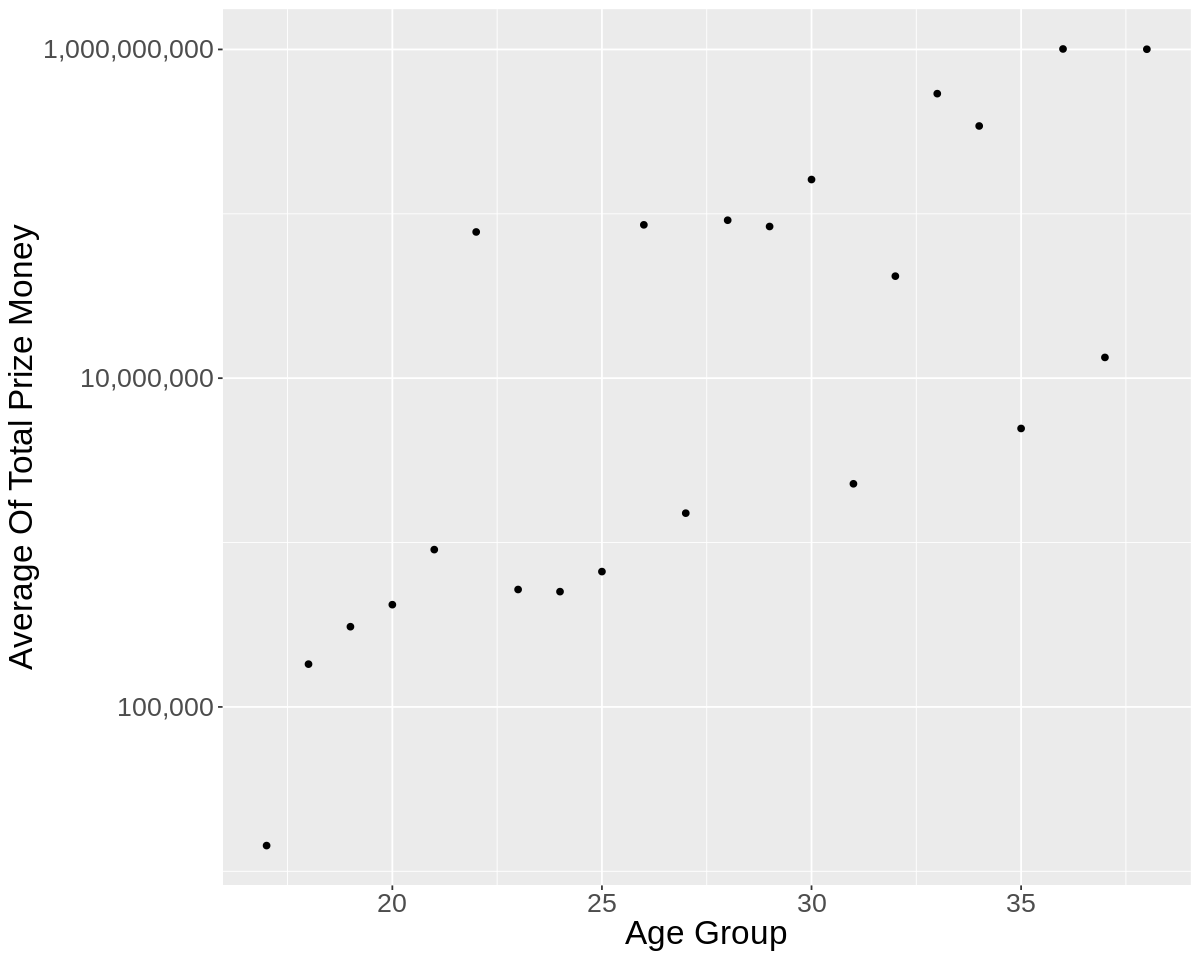

In [115]:
#Using only training data, summarize the data in at least one table.


max_prize_money <- player_stats_training |>
    select(Prize_Money) |>
    arrange(Prize_Money) |>
    slice(312)

print("Max Prize Money")
max_prize_money

min_prize_money <- player_stats_training |>
    select(Prize_Money) |>
    arrange(Prize_Money) |>
    slice(1)

print("Min Prize Money")
min_prize_money


# Average Total Prize Money Won for every Age group.
print("Average Total Prize Money Won for every Age Group")
average_age_prize_money <- player_stats_training |> 
    group_by(Age) |> 
    summarize(Prize_Money = mean(Prize_Money))

average_age_prize_money

options(repr.plot.height = 8, repr.plot.width = 10)
# Scatter plot showing the Average Total Prize Money won for every Age group. 
print("Scatter Plot: Average Total Prize Money Won for every Age Group")
average_age_prize_money_plot <- average_age_prize_money |>
    ggplot(aes(x = Age, y = Prize_Money)) + 
    geom_point() +
    xlab("Age Group") + 
    ylab("Average Of Total Prize Money") +
    scale_y_log10(labels = label_comma()) + 
    theme(text = element_text(size=20))

average_age_prize_money_plot


## Visualizations

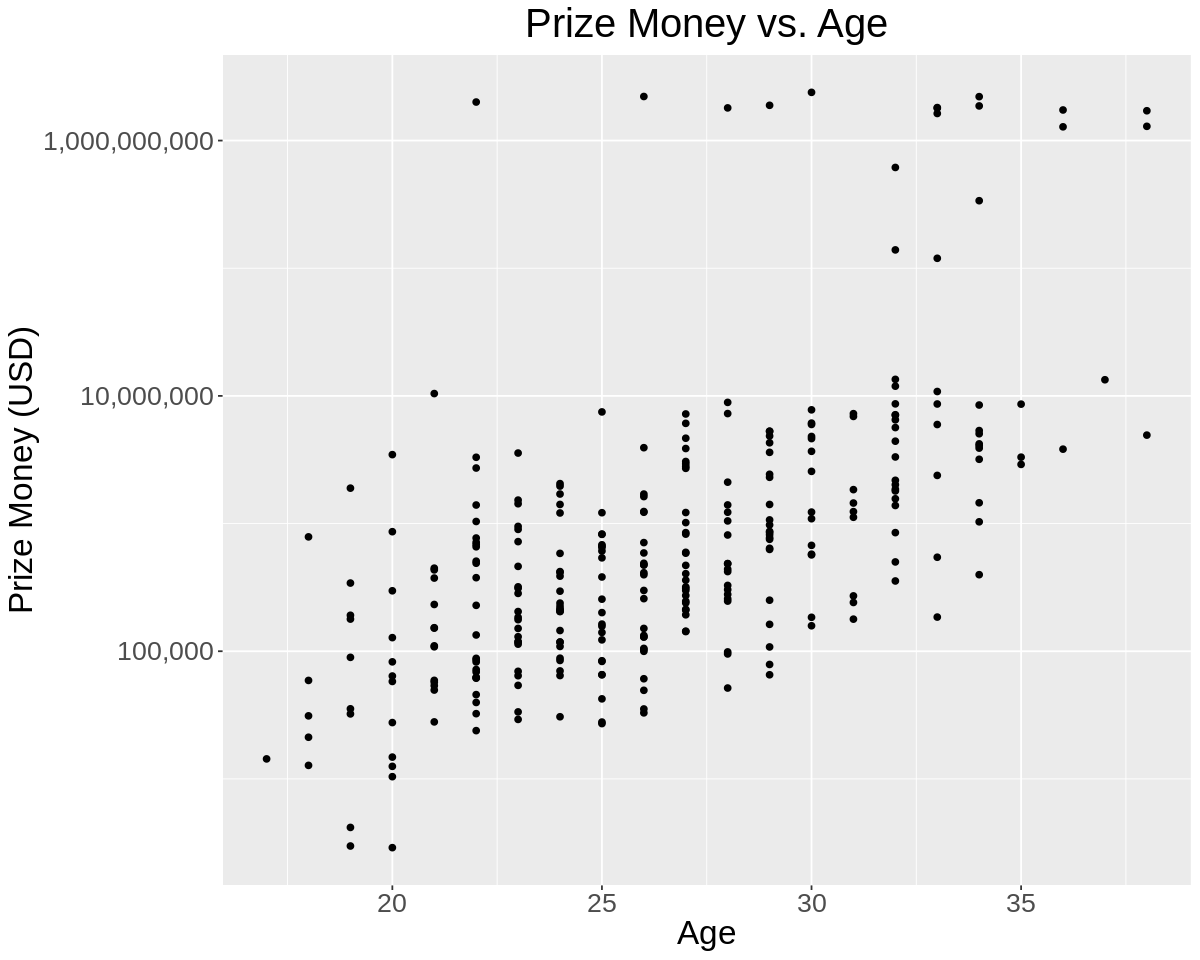

Warning message:
“Removed 1 rows containing missing values (geom_point).”


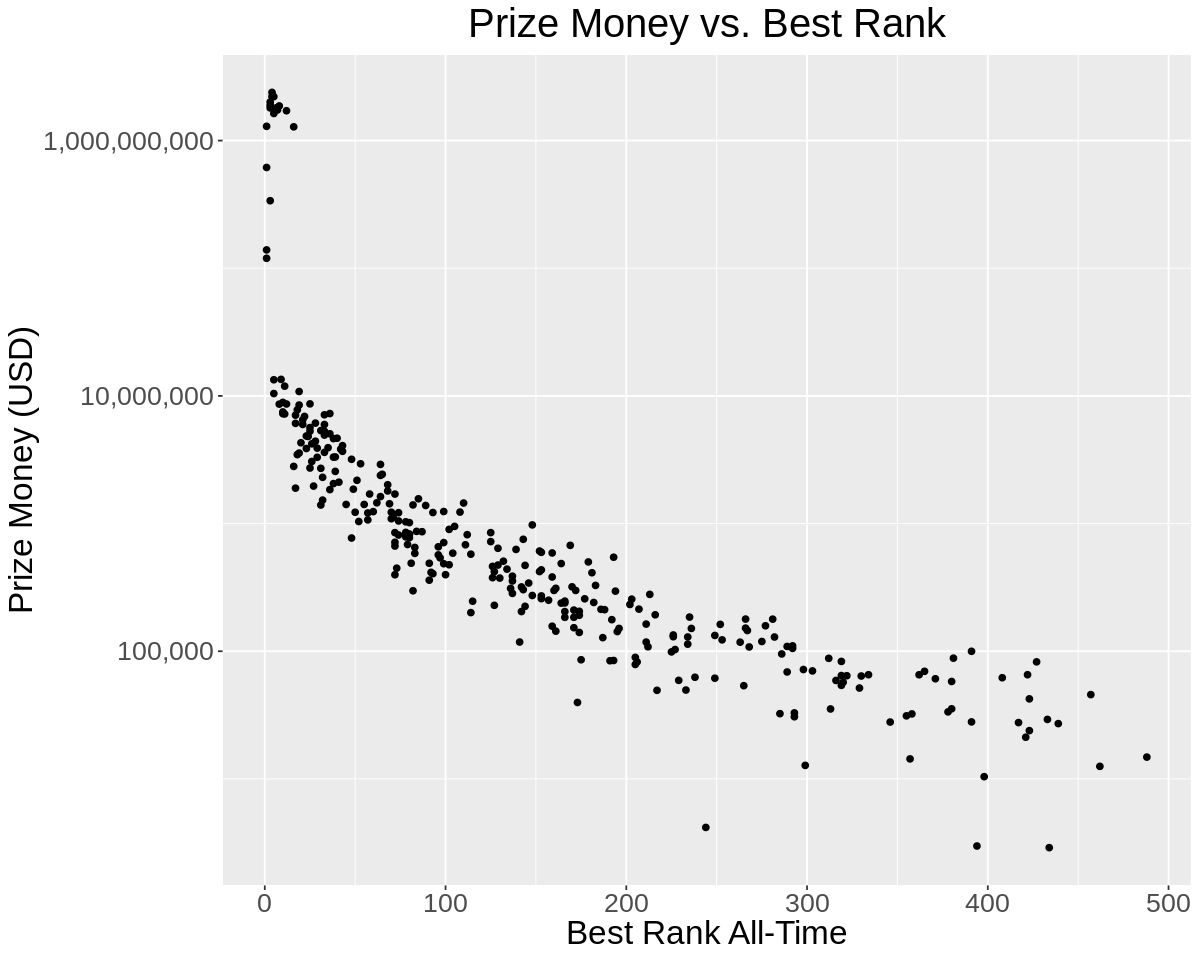

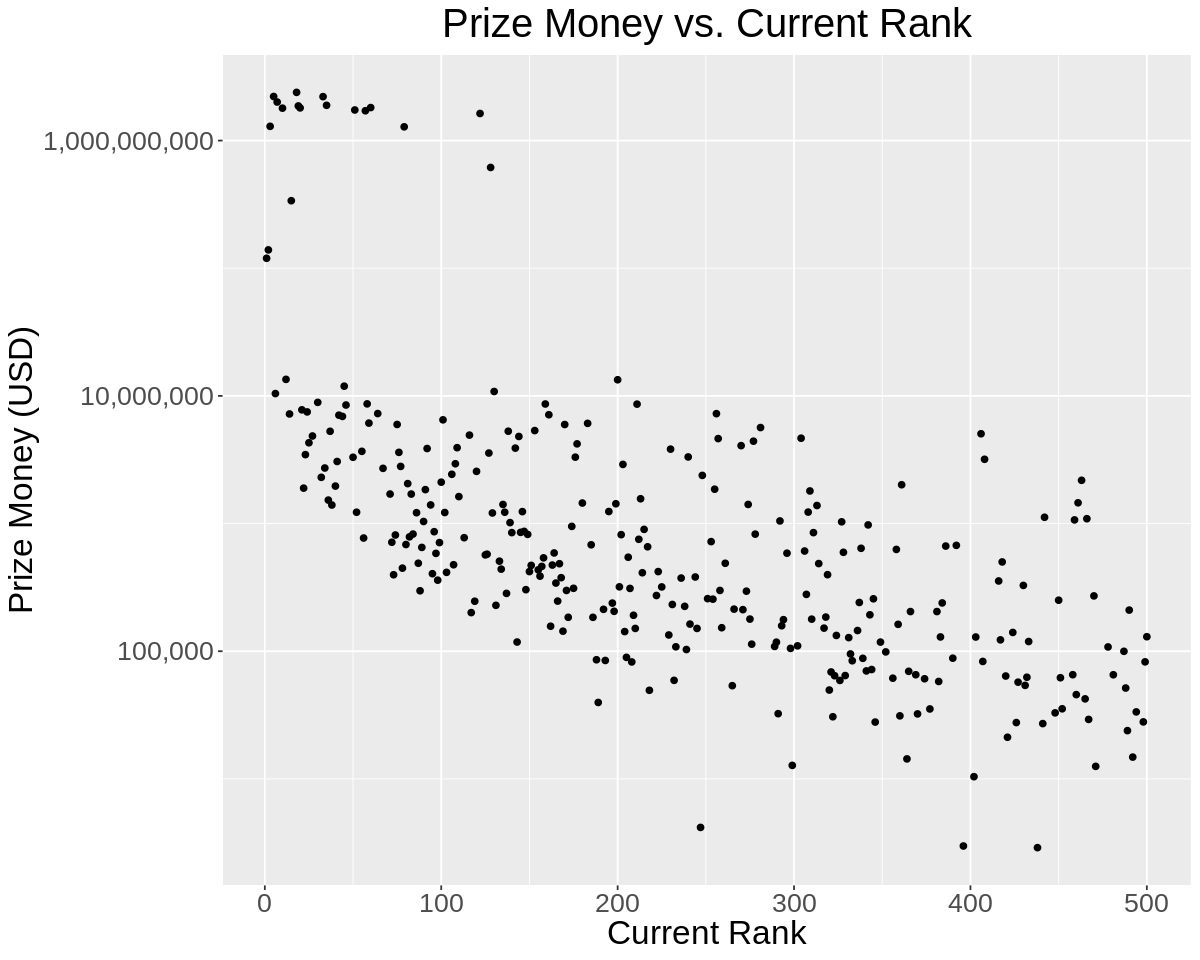

In [116]:
options(repr.plot.height = 8, repr.plot.width = 10)

player_stats_plot_age <- player_stats_training |> 
    ggplot(aes(x = Age, y = Prize_Money)) + 
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(x = "Age", y = "Prize Money (USD)", title = "Prize Money vs. Age") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

player_stats_plot_age


player_stats_plot_best_rank <- player_stats_training |> 
    ggplot(aes(x = Best_Rank, y = Prize_Money)) + 
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(x = "Best Rank All-Time", y = "Prize Money (USD)", title = "Prize Money vs. Best Rank") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

player_stats_plot_best_rank

player_stats_plot_current_rank <- player_stats_training |> 
    ggplot(aes(x = Current_Rank, y = Prize_Money)) + 
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(x = "Current Rank", y = "Prize Money (USD)", title = "Prize Money vs. Current Rank") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

player_stats_plot_current_rank

## Methods


In the kNN modeling, we will split this dataset into training (75%) and testing (25%) sets. Using cross validation (5-fold), we will select the optimal K value (from 1 - 50) with the lowest RMSPE (by plotting k value against RMSPE values) and use it to train our final model, which will be tested for accuracy on the test set data.

We believe age will be useful in our prediction because the older you are, the more time you have to win prize money. Additionally, best and current rank are good indicators of performance which translates to winning more tournaments with prize money rewards. 

Since all variables are on a continuous scale, we plan on using a regression model to predict total lifetime prize money using the players’ best rank, current rank, and age. Preliminary exploratory data analysis using plots have shown moderate to strong relationships. We will visualize the results by creating a scatter plot with our resulting data, and a prediction line. 


## Expected outcomes and significance 

We will expect to be able to predict the approximate prize money for a player in the top 500 by using best rank, current rank, and age as the classifiers. 

Our findings can help current pro tennis players with financial planning based on their predicted winnings in the future. In addition, these predictions can be helpful for up and coming tennis players predicted to go pro to attract sponsorships and endorsements based on their predicted winnings at their predicted rank at a specific age. 

As higher age allows a longer time period for players to pool up their prize money, future questions can look to find the prime ages where the average pro tennis player makes the most prize money. 
